In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
(x_train,y_train),(x_test,y_test)=mnist.load_data()

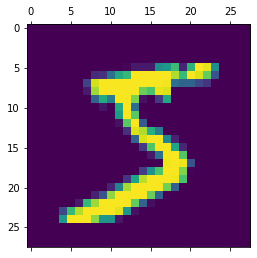

In [2]:
plt.matshow(x_train[0])

In [14]:
x_test=x_test/255
x_train=x_train/255

In [15]:
flattened_xtrain=x_train.reshape(len(x_train),28*28)
flattened_xtest=x_test.reshape(len(x_test),28*28)

In [16]:
y_test.shape

(10000,)

In [30]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
model=Sequential([
    Dense(10,input_shape=(784,),activation='softmax')
])

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
    
)

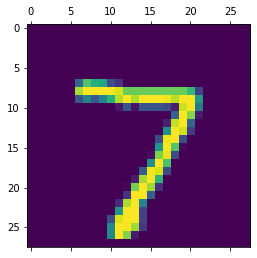

In [33]:
plt.matshow(x_test[0])

In [34]:
model.fit(flattened_xtrain,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.4727 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 844us/step - loss: 0.3044 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.2733 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 782us/step - loss: 0.2668 - accuracy: 0.9255


In [35]:
model.evaluate(flattened_xtest,y_test)

313/313 [==============================] - 0s 616us/step - loss: 0.2688 - accuracy: 0.9248


[0.2688300907611847, 0.9247999787330627]

In [36]:
y_test.shape

(10000,)

In [37]:
x_test[0
      ]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
predicted=model.predict(flattened_xtest)
predicted[0]

array([5.0425679e-06, 8.3806677e-11, 1.7208446e-05, 7.1925670e-03,
       4.8477699e-07, 3.8586557e-05, 4.6824372e-10, 9.9210680e-01,
       2.9566441e-05, 6.0979946e-04], dtype=float32)

In [39]:
import numpy as np
np.argmax(predicted[0])

7

In [40]:
predicted_labels=[np.argmax(number) for number in predicted]
predicted_labels[:4]

[7, 2, 1, 0]

In [28]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [41]:
tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    0,    6,   13,    1,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    8,  926,   18,    5,    5,   16,    9,   37,    5],
       [   1,    0,   18,  932,    1,   25,    3,    6,   16,    8],
       [   1,    1,    2,    2,  897,    0,   17,    4,    9,   49],
       [   7,    2,    2,   35,    7,  786,   15,    3,   27,    8],
       [   7,    3,    5,    1,    6,   13,  921,    0,    2,    0],
       [   1,    9,   23,   11,    6,    1,    0,  933,    3,   41],
       [   5,   10,    7,   34,    9,   35,   10,    8,  846,   10],
       [   9,    7,    1,   14,   18,    6,    1,    9,    5,  939]],
      dtype=int32)>